<a href="https://colab.research.google.com/github/shubhamk2001/Deep-Learning-Basics/blob/main/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Data = [[[(i+j)] for i in range(5)]for j in range(100)]
Data[:5]

[[[0], [1], [2], [3], [4]],
 [[1], [2], [3], [4], [5]],
 [[2], [3], [4], [5], [6]],
 [[3], [4], [5], [6], [7]],
 [[4], [5], [6], [7], [8]]]

In [ ]:
Target = [(i+5) for i in range(100)]
Target[:5]

[5, 6, 7, 8, 9]

In [ ]:
data = np.array(Data, dtype=float)
target = np.array(Target, dtype=float)

In [ ]:
data.shape, target.shape

((100, 5, 1), (100,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=4)

In [ ]:
# RNN
model = Sequential()
model.add(LSTM((1),input_shape =(5,1),return_sequences=False))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=1, verbose=1, validation_data=(x_test, y_test))

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0000e+00 - loss: 4280.7168 - val_accuracy: 0.0000e+00 - val_loss: 2969.3499
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 4650.9507 - val_accuracy: 0.0000e+00 - val_loss: 2969.0540
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 3844.3992 - val_accuracy: 0.0000e+00 - val_loss: 2967.2759
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 4453.2705 - val_accuracy: 0.0000e+00 - val_loss: 2883.4714
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: 4361.7354 - val_accuracy: 0.0000e+00 - val_loss: 2880.2998
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 4113.7271 - val_accuracy: 0.0000e+00 - val_loss: 2879.5835
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: 4037.7383 - val_accuracy: 0.0000e+00 - val_loss: 2879.1714
Epoch 8/50
80/80 ━━━

In [ ]:
results = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


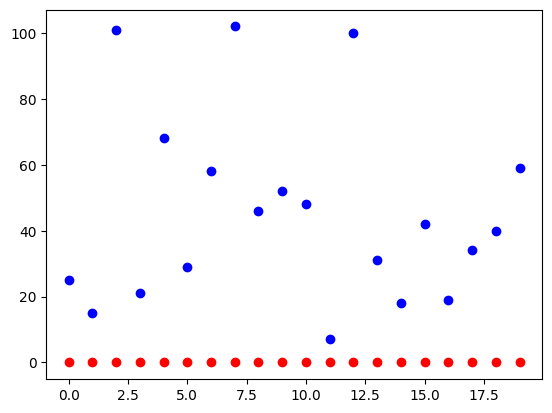

In [ ]:
plt.scatter(range(20), results, color='red')
plt.scatter(range(20), y_test, color='blue')
plt.show()

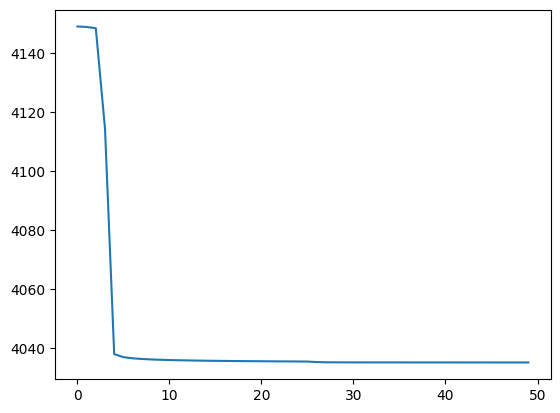

In [ ]:
plt.plot(history.history['loss'])

plt.show()

In [ ]:
# We are getting so bad results because we have not normalized the data, because of this
# there might be the chances of exploding the gradient descent.

In [ ]:
# Normalized data
Data = [[[(i+j)/100] for i in range(5)]for j in range(100)]
Data[:5]

[[[0.0], [0.01], [0.02], [0.03], [0.04]],
 [[0.01], [0.02], [0.03], [0.04], [0.05]],
 [[0.02], [0.03], [0.04], [0.05], [0.06]],
 [[0.03], [0.04], [0.05], [0.06], [0.07]],
 [[0.04], [0.05], [0.06], [0.07], [0.08]]]

In [ ]:
Target = [(i+5)/100 for i in range(100)]
Target[:5]

[0.05, 0.06, 0.07, 0.08, 0.09]

In [ ]:
data = np.array(Data, dtype=float)
target = np.array(Target, dtype=float)

In [ ]:
data.shape, target.shape

((100, 5, 1), (100,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=4)

In [ ]:
# RNN
model = Sequential()
model.add(LSTM((1),input_shape =(5,1),return_sequences=False))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# for better result and accuracy increase the number of epochs like 500 or 1000 from 50
history = model.fit(x_train, y_train, epochs=500, batch_size=1, verbose=1, validation_data=(x_test, y_test))

Epoch 1/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0026 - val_accuracy: 0.0500 - val_loss: 0.0035
Epoch 2/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0019 - val_accuracy: 0.0500 - val_loss: 0.0034
Epoch 3/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0030 - val_accuracy: 0.0500 - val_loss: 0.0034
Epoch 4/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0021 - val_accuracy: 0.0500 - val_loss: 0.0033
Epoch 5/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0018 - val_accuracy: 0.0500 - val_loss: 0.0033
Epoch 6/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0018 - val_accuracy: 0.0500 - val_loss: 0.0033
Epoch 7/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0024 - val_accuracy: 0.0500 - val_loss: 0.0032
Epoch 8/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0

In [ ]:
results = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


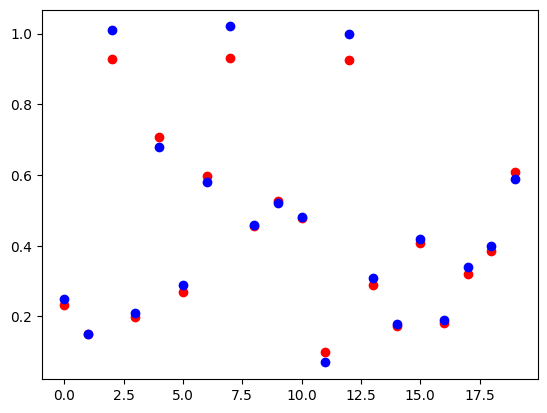

In [ ]:
plt.scatter(range(20), results, color='red')
plt.scatter(range(20), y_test, color='blue')
plt.show()

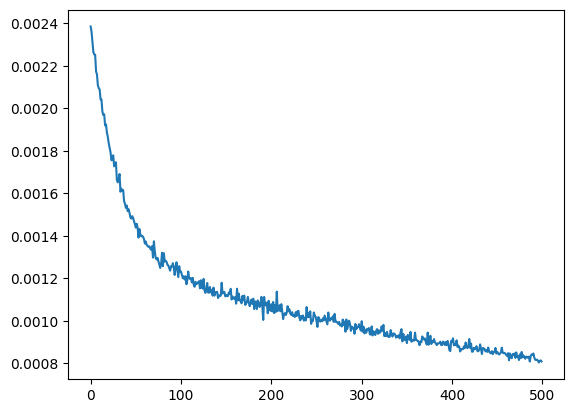

In [ ]:
plt.plot(history.history['loss'])

plt.show()